In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [154]:
#파일 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [155]:
#데이터 확인
print('train 데이터 확인')
print('======='*4)
print(train.info()) #최다 행수가 8693이므로 결측치가 존재하는 열은 12개
print('')
print('test 데이터 확인')
print('======='*4)
print(test.info()) #최다 행수가 4277이므로 결측치가 존재하는 열은 12개

train 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

test 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #  

In [156]:
train.describe() #수치형 데이터 확인
#나이 제외 spaceship의 서비스 소비 금액의 중앙값은 0

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [157]:
train.describe(include=['O']) #범주형 데이터 확인
#HomePlanet은 3개의 카테고리 최빈값은 'Earth'
#CryoSleep은 True or False 최빈값은 False
#Destination은 3개의 카테고리 최빈값은 'TRAPPIST-1e'
#VIP True or False 최빈값은 False

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Text(0.5, 1.0, 'Target distribution')

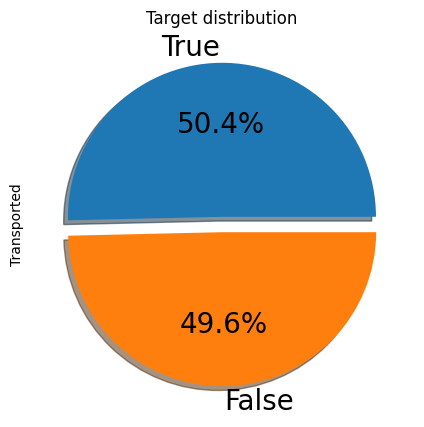

In [158]:
#데이터 시각화
plt.figure(figsize=(5,5))

# 파이 플롯을 사용, 데이터 정렬 및 퍼센티지를 비교함
train['Transported'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', shadow=True, textprops={'fontsize':20}).set_title("Target distribution")
# 차원이동 및 차원이동X의 비율이 균일

In [159]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

#고향이 europa 일때 차원이동 확률이 가장 높고 earth일때 가장 낮음

,HomePlanet,Transported
0,Earth,0.423946
2,Mars,0.523024
1,Europa,0.658846


<Axes: xlabel='HomePlanet', ylabel='Count'>

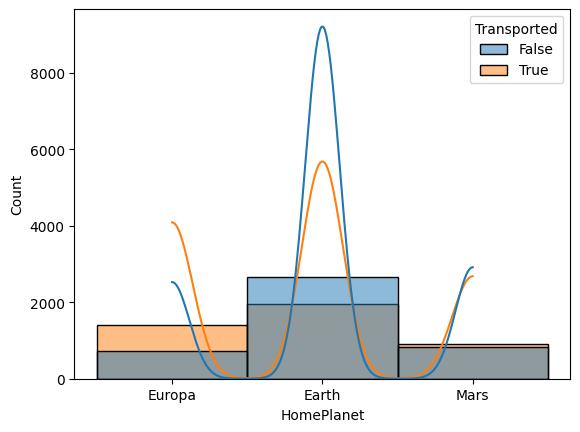

In [160]:
#HomePlanet
sns.histplot(data=train, x='HomePlanet', hue='Transported', kde=True)
#Europa의 경우 차원이동할 비율이 더 높고, Earth의 경우 차원이동 하지 못할 확률이 더 높음
#Mars의 경우 비슷함

In [161]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')
#동면중일때 차원이동 확률이 월등히 높음

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


Text(0, 0.5, 'Transport Rate (Percentage)')

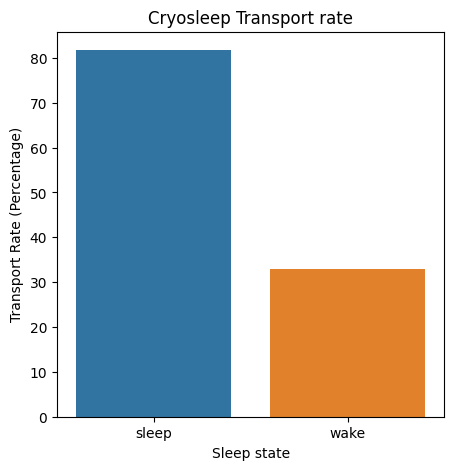

In [162]:
#CryoSleep
sleep = train[train.CryoSleep == True].Transported
sleep_rate = sum(sleep)/len(sleep)*100
wake = train[train.CryoSleep == False].Transported
wake_rate = sum(wake)/len(wake)*100
cryosleep = pd.DataFrame(data={'Sleep state': ['sleep', 'wake'], 'Transport rate': [sleep_rate, wake_rate]})
plt.figure(figsize=(5, 5))
plt.title('Cryosleep Transport rate')
sns.barplot(data=cryosleep, x='Sleep state', y='Transport rate')
plt.ylabel('Transport Rate (Percentage)')
#동면중 차원이동비율이 더 높음

In [163]:
train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')
#목적지가 55 Cancri e 일때 차원이동 확률이 가장 높고 TRAPPIST-1e일때 가장 낮음

,Destination,Transported
2,TRAPPIST-1e,0.471175
1,PSO J318.5-22,0.503769
0,55 Cancri e,0.610000


<Axes: xlabel='Destination', ylabel='Count'>

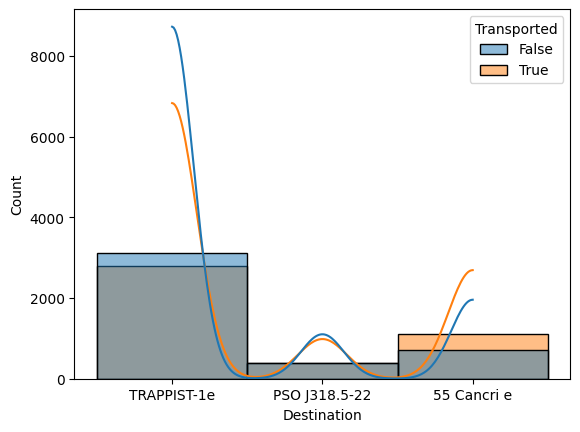

In [164]:
#Destination
sns.histplot(data=train, x='Destination', hue='Transported', kde=True)
#55 Cancri e의 경우 차원이동할 비율이 더 높고, TRAPPIST-1e의 경우 차원이동 하지 못할 확률이 더 높음
#PSO J318.5-22의 경우 비슷함

In [165]:
train[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')
#VIP가 아닐때 차원이동 확률이 높고 VIP일때 차원이동 확률은 낮은편

,VIP,Transported
1,True,0.381910
0,False,0.506332


Text(0, 0.5, 'Transport Rate (Percentage)')

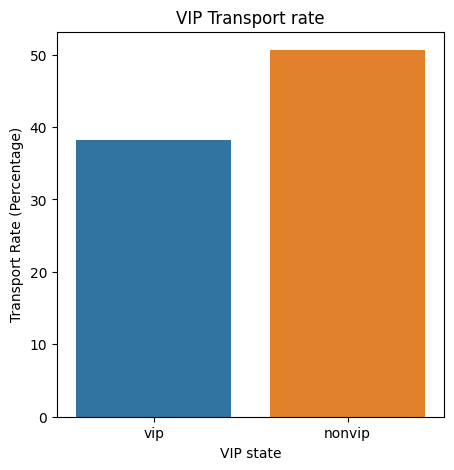

In [166]:
#VIP
vip = train[train.VIP == True].Transported
vip_rate = sum(vip)/len(vip)*100
nonvip = train[train.VIP == False].Transported
nonvip_rate = sum(nonvip)/len(nonvip)*100
VIP_sel = pd.DataFrame(data={'VIP state': ['vip', 'nonvip'], 'Transport rate': [vip_rate, nonvip_rate]})
plt.figure(figsize=(5, 5))
plt.title('VIP Transport rate')
sns.barplot(data=VIP_sel, x='VIP state', y='Transport rate')
plt.ylabel('Transport Rate (Percentage)')
#vip가 아닐 때 차원이동비율이 더 높음

<Axes: xlabel='Age', ylabel='Count'>

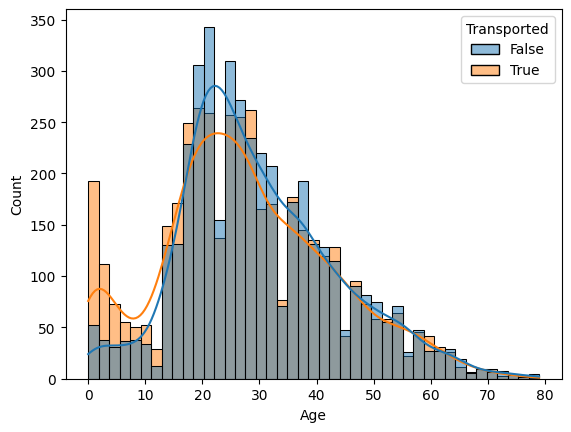

In [167]:
#Age
sns.histplot(data=train, x='Age', hue='Transported', kde=True)
#Age의 경우 12세이하 차원이동 비율이 높고, 18~26세의 차원이동 실패확률이 높은 편

In [168]:
#Cabin은 결측치를 최빈값으로 채우고 갑판, 객실번호, 방향으로 나눔
train.describe(include=['O'])
#최빈값 G/734/S

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [169]:
test.describe(include=['O'])
#최빈값 G/160/P

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [170]:
train['Cabin'] = train['Cabin'].fillna('G/734/S')
test['Cabin'] = test['Cabin'].fillna('G/160/P')

# Cabin 을 갑판/객실번호/방향 들을 나눠 그룹화
def extract_deck(s):
    return s.split('/')[0] # 갑판의 경우, 슬래쉬 앞부분의 자료

def extract_num(s):
    return s.split('/')[1] # 좌석의 경우, 슬래쉬 중간부분의 자료

def extract_side(s):
    return s.split('/')[2] # 방향의 경우, 슬래쉬 오른쪽 부분의 자료

train['Deck'] = train['Cabin'].apply(extract_deck)
train['Num'] = train['Cabin'].apply(extract_num)
train['Side'] = train['Cabin'].apply(extract_side)

test['Deck'] = test['Cabin'].apply(extract_deck)
test['Num'] = test['Cabin'].apply(extract_num)
test['Side'] = test['Cabin'].apply(extract_side)
#Deck의 경우 A,B,C,D,E,F,G,T 로 나뉨
#Num의 경우 0~999까지
#Side의 경우 S와 P

In [171]:
train[['Deck', 'Transported']].groupby(['Deck'], as_index=False).mean().sort_values(by='Transported')
#갑판이 B,C일때 차원이동 확률 월등히 높음
#T,E,D는 낮은편

,Deck,Transported
7,T,0.200000
4,E,0.357306
3,D,0.433054
5,F,0.439871
0,A,0.496094
6,G,0.515228
2,C,0.680054
1,B,0.734275


<Axes: xlabel='Deck', ylabel='Count'>

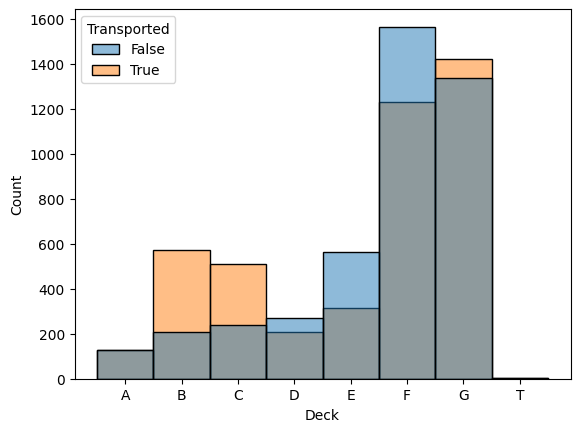

In [172]:
train['Deck'] = pd.Categorical(train['Deck'], categories=['A','B','C','D','E','F','G','T'], ordered=True)
test['Deck'] = pd.Categorical(test['Deck'], categories=['A','B','C','D','E','F','G','T'], ordered=True)

sns.histplot(data=train, x='Deck', hue='Transported', kde=False)
#B,C,G 는 차원이동할 확률이 높음
#D,E,F는 차원이동이 안될 확률이 높음

In [173]:
train[['Side', 'Transported']].groupby(['Side'], as_index=False).mean().sort_values(by='Transported')
#방향이 S일때 좀 높은 듯 (유의미하진 않음)

,Side,Transported
0,P,0.451260
1,S,0.552708


<Axes: xlabel='Side', ylabel='Count'>

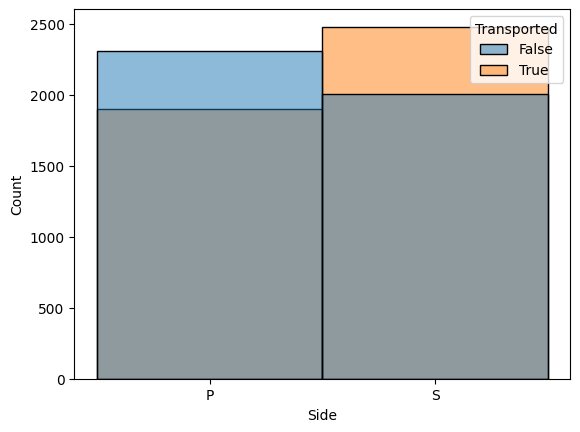

In [174]:
sns.histplot(data=train, x='Side', hue='Transported', kde=False)

<function matplotlib.pyplot.show(close=None, block=None)>

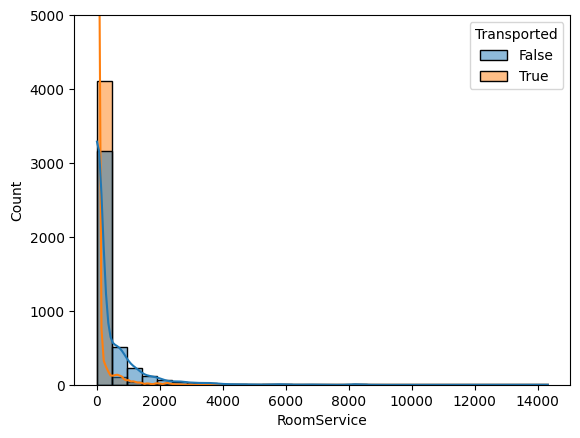

In [175]:
#RoomService의 경우 소비하지 않을 수록 차원이동 확률이 높다 볼 수 있음
sns.histplot(data=train, x='RoomService',  bins=30, kde=True, hue='Transported')
plt.ylim([0,5000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

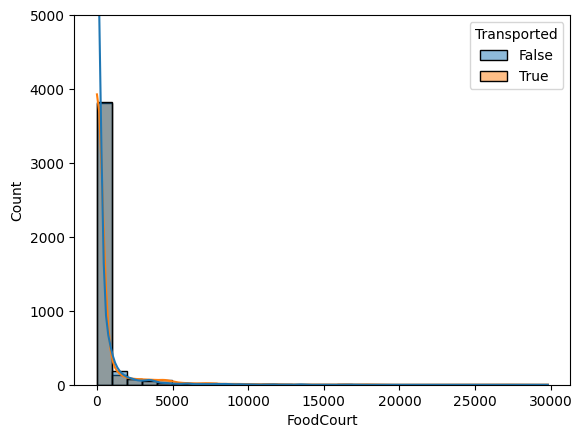

In [176]:
#FoodCourt 경우 전체적으로 평이한편
sns.histplot(data=train, x='FoodCourt',  bins=30, kde=True, hue='Transported')
plt.ylim([0,5000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

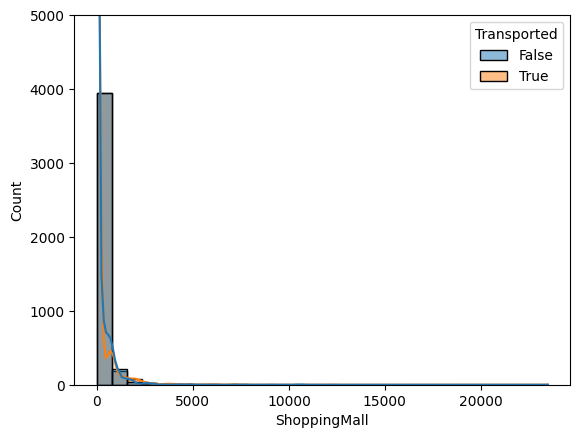

In [177]:
# ShoppingMall경우 전체적으로 평이한편
sns.histplot(data=train, x='ShoppingMall',  bins=30, kde=True, hue='Transported')
plt.ylim([0,5000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

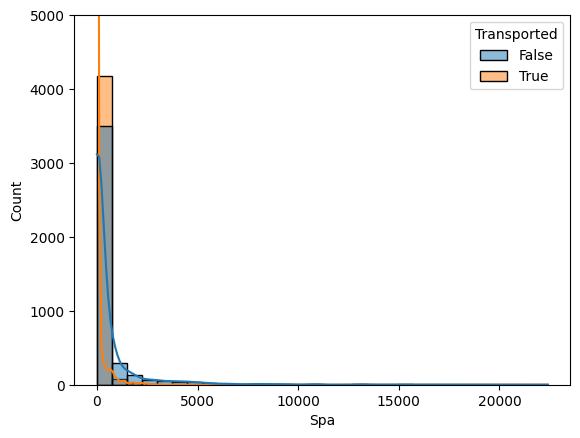

In [178]:
# Spa의 경우  소비하지 않을 수록 차원이동 확률이 높다 볼 수 있음
sns.histplot(data=train, x='Spa',  bins=30, kde=True, hue='Transported')
plt.ylim([0,5000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

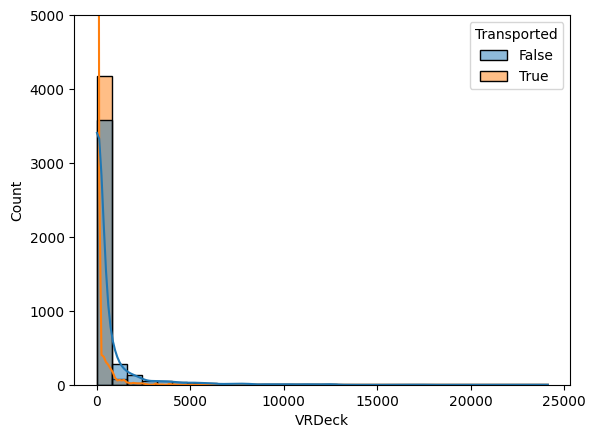

In [179]:
# VRDeck의 경우  소비하지 않을 수록 차원이동 확률이 높다 볼 수 있음
sns.histplot(data=train, x='VRDeck',  bins=30, kde=True, hue='Transported')
plt.ylim([0,5000])
plt.show

In [180]:
# 데이터 정제
train.info()
#카테고리형 데이터 = HomePlanet,Destination,Age_Group,Deck,Side

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8693 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  Deck          8693 non-null   category
 15  Num           8693 non-null   object  
 16  Side          8693 non-null   object  
dtypes: bool(1), category(1), float64(6), object(9)
memor

In [181]:
train.describe(include=['O']) 
#HomePlanet은 Earth, CryoSleep은 False, Destination은 TRAPPIST-1e
#VIP는 False, Name은 쓸모 없다 생각 지움

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Num,Side
count,8693,8492,8476,8693,8511,8490,8493,8693,8693
unique,8693,3,2,6560,3,2,8473,1817,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,734,S
freq,1,4602,5439,207,5915,8291,2,208,4487


In [182]:
train.describe() #수치형 데이터 확인
#Age는 평균값, 서비스 소비가격들은 중앙값으로 채우자

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [183]:
Missing_features = ['FoodCourt', 'Spa', 'ShoppingMall', 'RoomService', 'VRDeck', 'Age']

for feature in Missing_features:
    if feature == 'Age':
        fill_train = train[feature].mean() #나이는 평균값
        fill_test = test[feature].mean()
    elif feature in ['FoodCourt', 'Spa', 'ShoppingMall', 'RoomService', 'VRDeck']:
        fill_train = 0  # 소비한 가격의 경우 중앙값
        fill_test = 0
    train[feature] = train[feature].fillna(fill_train)
    test[feature] = test[feature].fillna(fill_test)
#고향행성, 목적지, 동면여부, VIP 여부,Cabin는 최빈값
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')
train['CryoSleep'] = train['CryoSleep'].fillna(False)
train['VIP'] = train['VIP'].fillna(False)

test['HomePlanet'] = test['HomePlanet'].fillna('Earth')
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')
test['CryoSleep'] = test['CryoSleep'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)


In [184]:
#Cabin은 나눠놨기 때문에 지우고 Name은 쓸모없다 판단 지우기
train.drop(['Name','Cabin'], axis = 1, inplace = True)
test.drop(['Name','Cabin'], axis = 1, inplace = True)

In [185]:
train.info() #결측치가 잘 채워짐 
#잘 지워짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   object  
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   bool    
 6   RoomService   8693 non-null   float64 
 7   FoodCourt     8693 non-null   float64 
 8   ShoppingMall  8693 non-null   float64 
 9   Spa           8693 non-null   float64 
 10  VRDeck        8693 non-null   float64 
 11  Transported   8693 non-null   bool    
 12  Deck          8693 non-null   category
 13  Num           8693 non-null   object  
 14  Side          8693 non-null   object  
dtypes: bool(3), category(1), float64(6), object(5)
memory usage: 781.5+ KB


In [186]:
#데이터 가공
#사용할 카테고리형 데이터를 수치적 데이터로 변환
#원-핫-인코딩
features_cat = ['HomePlanet', 'Destination', 'Deck', 'Side'] # 카테고리형 데이터 칼럼 묶음의 설정
for feature in features_cat:
    train[pd.get_dummies(train[feature], prefix=feature).columns] = pd.get_dummies(train[feature], prefix=feature)
    test[pd.get_dummies(test[feature], prefix=feature).columns] = pd.get_dummies(test[feature], prefix=feature)
# 카테고리형 데이터를 칼럼별로 나누어서 수치적인 데이터로 변환함

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PassengerId                8693 non-null   object  
 1   HomePlanet                 8693 non-null   object  
 2   CryoSleep                  8693 non-null   bool    
 3   Destination                8693 non-null   object  
 4   Age                        8693 non-null   float64 
 5   VIP                        8693 non-null   bool    
 6   RoomService                8693 non-null   float64 
 7   FoodCourt                  8693 non-null   float64 
 8   ShoppingMall               8693 non-null   float64 
 9   Spa                        8693 non-null   float64 
 10  VRDeck                     8693 non-null   float64 
 11  Transported                8693 non-null   bool    
 12  Deck                       8693 non-null   category
 13  Num                        8693 n

In [188]:
#원핫인코딩한 데이터 삭제
#Num도 0~999로 쓸모없다 판단
train.drop(['HomePlanet', 'Destination', 'Deck', 'Side','Num'], axis = 1, inplace = True)
test.drop(['HomePlanet', 'Destination', 'Deck', 'Side','Num'], axis = 1, inplace = True)

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   bool   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [190]:
#bool타입 데이터 수치형으로 변환
#Transported는 유지
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int32  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int32  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [192]:
#모델링
# 학습데이터 셋 분류
#PassengerId와 Transported 를 없앤게 학습할 데이터
train_data = train.drop(['PassengerId','Transported'],axis=1)
target = train['Transported']
pred_data = test.drop(['PassengerId'],axis=1)

In [193]:
train_data.shape,pred_data.shape

((8693, 24), (4277, 24))

In [194]:
#랜덤포레스트와 로지스틱회귀
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
#랜덤포레스트 하이퍼 파라미터 튜닝
params_rf = { 'n_estimators' : [50,80],
           'max_depth' : [10, 12, 10],
           'min_samples_leaf' : [4,6,8],
           'min_samples_split' : [4,6,8]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params_rf, cv = 3, n_jobs = -1)
grid_cv.fit(train_data, target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 80}
최고 예측 정확도: 0.7962


In [195]:
from sklearn.model_selection import GridSearchCV
params_lg = {  
    'penalty' : ['l1', 'l2'], # 'none' 포함 가능
    'C': [0.01,0.0075,0.005],
    'solver':['saga'],
    'max_iter':[50,70,100]
            }

# LogisticRegression 객체 생성 후 GridSearchCV 수행
lg = LogisticRegression()
grid_cv = GridSearchCV(lg, param_grid = params_lg, cv = 5)
grid_cv.fit(train_data, target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'C': 0.01, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
최고 예측 정확도: 0.7889


In [196]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습
rf = RandomForestClassifier(n_estimators = 80, 
                                max_depth = 12,
                                min_samples_leaf = 6,
                                min_samples_split = 4,
                                random_state = 0,
                                n_jobs = -1)
rf.fit(train_data, target)
lg = LogisticRegression(C=0.01,max_iter=50,penalty='l1',solver='saga')
lg.fit(train_data, target)

LogisticRegression(C=0.01, max_iter=50, penalty='l1', solver='saga')

In [197]:
#예측
y_pred_rf = rf.predict(pred_data)
y_pred_lg = lg.predict(pred_data)

In [201]:
sub_df = pd.read_csv('sample_submission.csv')
sub_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [202]:
sub_df['Transported'] = y_pred_rf
sub_df.to_csv('submission_Spaceship_Titanic_rf.csv', index = False)

In [203]:
sub_df['Transported'] = y_pred_lg
sub_df.to_csv('submission_Spaceship_Titanic_logreg.csv', index = False)